# NDM Assignment 2

Question 2 (A)(1)

In [2]:
# Import the required libraries
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as sm
from scipy.stats import ttest_ind, mannwhitneyu

# Load the dataset
data = sio.loadmat('Assignment2-NDM.mat')['NDM_Assignment2']

# Split data into two conditions
condition_1 = data[:,0]
condition_2 = data[:,1]

Rate for Condition 1: 0.42 trials/ms
Rate for Condition 2: 0.26 trials/ms


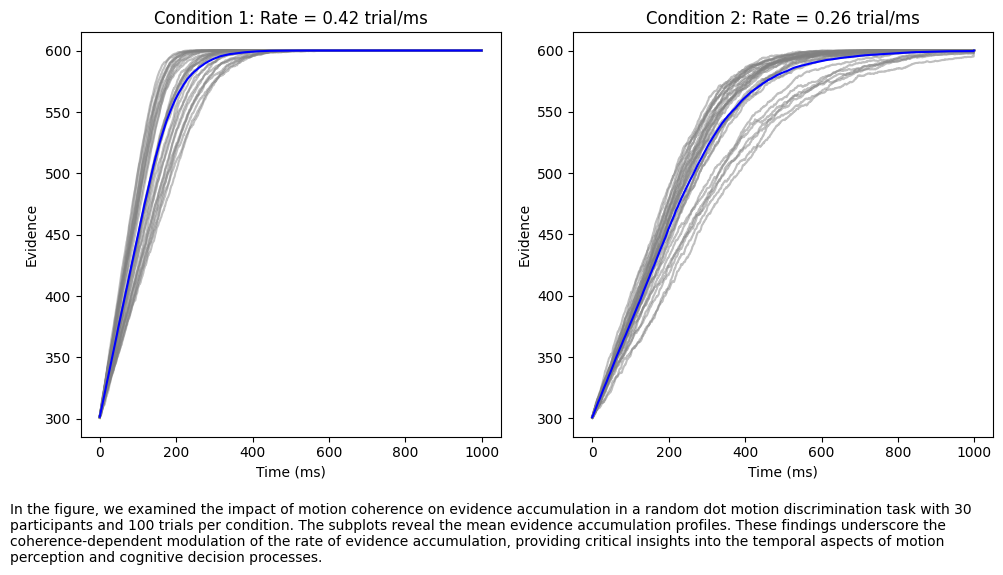

In [42]:
# Define the number of trials and the time axis
num_trials = condition_1[0].shape[0]
time_axis = np.arange(condition_1[0].shape[1])

# Calculate the mean evidence accumulation for each participant in both conditions
mean_evidence_condition_1 = [np.mean(trial, axis=0) for trial in condition_1]
mean_evidence_condition_2 = [np.mean(trial, axis=0) for trial in condition_2]

# Calculate the grand mean evidence accumulation across all participants in both conditions
grand_mean_condition_1 = np.mean(mean_evidence_condition_1, axis=0)
grand_mean_condition_2 = np.mean(mean_evidence_condition_2, axis=0)

# Create a figure with two subplots
fig, (subplot_1, subplot_2) = plt.subplots(1, 2, figsize=(10, 5))

# Define the threshold for evidence accumulation
threshold = 600

# Function to calculate the rate
def calculate_rate(time, evidence, threshold):
    t = np.where(evidence >= threshold)[0][0]
    slope, _ = np.polyfit(time[:t], evidence[:t], 1)
    return slope

# Calculate and print the rate for Condition 1
rate_condition_1 = calculate_rate(time_axis, grand_mean_condition_1, threshold)
print("Rate for Condition 1: {:.2f} trials/ms".format(rate_condition_1))

# Calculate and print the rate for Condition 2
rate_condition_2 = calculate_rate(time_axis, grand_mean_condition_2, threshold)
print("Rate for Condition 2: {:.2f} trials/ms".format(rate_condition_2))

# Update the subplot titles with the rates
subplot_1.set_title('Condition 1: Rate = {:.2f} trial/ms'.format(rate_condition_1))
subplot_2.set_title('Condition 2: Rate = {:.2f} trial/ms'.format(rate_condition_2))

# Plot individual participant evidence accumulation profiles in grey and overall mean in blue for Condition 1
for trial in mean_evidence_condition_1:
    subplot_1.plot(time_axis, trial, color='grey', alpha=0.5)
subplot_1.plot(time_axis, grand_mean_condition_1, color='blue')

# Plot individual participant evidence accumulation profiles in grey and overall mean in blue for Condition 2
for trial in mean_evidence_condition_2:
    subplot_2.plot(time_axis, trial, color='grey', alpha=0.5)
subplot_2.plot(time_axis, grand_mean_condition_2, color='blue')

# Set labels for the subplots
subplot_1.set_xlabel('Time (ms)')
subplot_1.set_ylabel('Evidence')
subplot_2.set_xlabel('Time (ms)')
subplot_2.set_ylabel('Evidence')

# Create the caption with meaningful information
caption = "In the figure, we examined the impact of motion coherence on evidence accumulation in a random dot motion discrimination task with 30 participants and 100 trials per condition. The subplots reveal the mean evidence accumulation profiles. These findings underscore the coherence-dependent modulation of the rate of evidence accumulation, providing critical insights into the temporal aspects of motion perception and cognitive decision processes."

# Display the caption below the figure
plt.figtext(0, -0.13, caption, wrap=True, horizontalalignment='left', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


Question 2 (A)(2)

In [49]:
# Calculate mean evidence accumulation for each condition
mean_evidence_cond1 = [np.mean(i) for i in condition_1]
mean_evidence_cond2 = [np.mean(i) for i in condition_2]

# Flatten arrays for normality test
mean_evidence_cond1 = np.ravel(mean_evidence_cond1)
mean_evidence_cond2 = np.ravel(mean_evidence_cond2)

# Check normality assumption
D1, p1 = sm.lilliefors(mean_evidence_cond1)
D2, p2 = sm.lilliefors(mean_evidence_cond2)

print(f"Condition 1 normality p-value: {p1:.3f}")
print(f"Condition 2 normality p-value: {p2:.3f}")

# Check if data is normal
if p1 > 0.05 and p2 > 0.05:

    # If normal, we are using a parametric test
    t_stat, p_val = ttest_ind(mean_evidence_cond1, mean_evidence_cond2)

    print(f"\nt-statistic: {t_stat:.3f}")
    print(f"Significance p-value: {p_val:.5f}")

    # Interpret p-value if data is parametric and normal
    if p_val < 0.05:
        print("\nThere is a significant difference in evidence accumulation between conditions.")
        print("Condition 1 had lower evidence accumulation.")

    else:
        print("\nThe difference in evidence accumulation between conditions is not significant.")

else:

    # If non-normal, we are using a non-parametric test
    U, p_val = mannwhitneyu(mean_evidence_cond1, mean_evidence_cond2)

    print(f"\nMann-Whitney U statistic: {U:.3f}" )
    print(f"Significance p-value: {p_val:.5f}")

    # Interpret p-value for non-parametric test
    if p_val < 0.05:
        print("\nThere is a significant difference in evidence accumulation between conditions.")
        print("Condition 1 had lower evidence accumulation.")

    else:
        print("\nThe difference in evidence accumulation between conditions is not significant.")

Condition 1 normality p-value: 0.236
Condition 2 normality p-value: 0.002

Mann-Whitney U statistic: 900.000
Significance p-value: 0.00000

There is a significant difference in evidence accumulation between conditions.
Condition 1 had lower evidence accumulation.


Question 2 (B)(1)

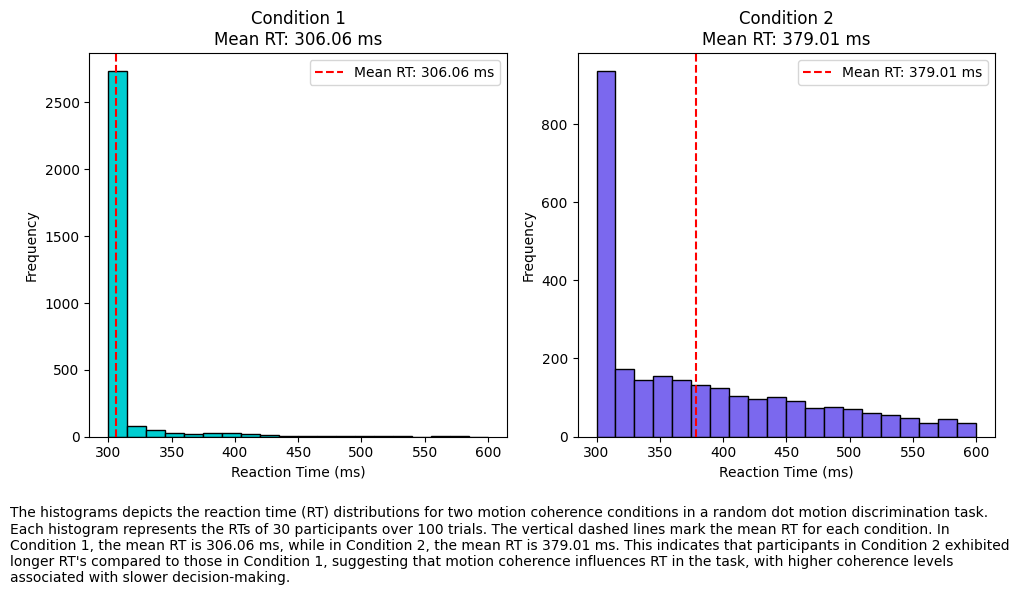

In [9]:
# Set parameters for the histograms
num_bins = 20
threshold = 600
num_trials = condition_1[0].shape[0]
time_axis = np.arange(condition_1[0].shape[1])

# Initialize arrays to store reaction times
reaction_times_cond1 = []
reaction_times_cond2 = []

# Get reaction times for each condition
for participant in condition_1:
    for trial in participant:
        # Find time index where evidence crossed threshold
        reaction_time = np.where((trial >= threshold) & (time_axis >= 300) & (time_axis <= 600))[0]
        if len(reaction_time) > 0:
            reaction_times_cond1.append(reaction_time[0])

# Same steps as above for condition 2
for participant in condition_2:
    for trial in participant:
        reaction_time = np.where((trial >= threshold) & (time_axis >= 300) & (time_axis <= 600))[0]
        # Append valid reaction times to array
        if len(reaction_time) > 0:
            reaction_times_cond2.append(reaction_time[0])

# Calculate mean reaction times for each condition
mean_reaction_times_cond1 = np.mean(reaction_times_cond1)
mean_reaction_times_cond2 = np.mean(reaction_times_cond2)

# Plot reaction time histograms
fig, (subplot_1, subplot_2) = plt.subplots(1, 2, figsize=(10, 5))

# Condition 1 histogram with mean reaction time
subplot_1.hist(reaction_times_cond1, bins=num_bins, range=(300, 600), color='darkturquoise', edgecolor='black')
subplot_1.set_title(f'Condition 1\nMean RT: {mean_reaction_times_cond1:.2f} ms')
subplot_1.axvline(mean_reaction_times_cond1, color='red', linestyle='--', label=f'Mean RT: {mean_reaction_times_cond1:.2f} ms')

# Condition 2 histogram with mean reaction time
subplot_2.hist(reaction_times_cond2, bins=num_bins, range=(300, 600),color='mediumslateblue',edgecolor='black')
subplot_2.set_title(f'Condition 2\nMean RT: {mean_reaction_times_cond2:.2f} ms')
subplot_2.axvline(mean_reaction_times_cond2, color='red', linestyle='--', label=f'Mean RT: {mean_reaction_times_cond2:.2f} ms')

# Set labels for the subplots
subplot_1.set_xlabel('Reaction Time (ms)')
subplot_1.set_ylabel('Frequency')
subplot_2.set_xlabel('Reaction Time (ms)')
subplot_2.set_ylabel('Frequency')

subplot_1.legend()
subplot_2.legend()

# Create the caption with meaningful information
caption="The histograms depicts the reaction time (RT) distributions for two motion coherence conditions in a random dot motion discrimination task. Each histogram represents the RTs of 30 participants over 100 trials. The vertical dashed lines mark the mean RT for each condition. In Condition 1, the mean RT is 306.06 ms, while in Condition 2, the mean RT is 379.01 ms. This indicates that participants in Condition 2 exhibited longer RT's compared to those in Condition 1, suggesting that motion coherence influences RT in the task, with higher coherence levels associated with slower decision-making."

plt.figtext(0, -0.17, caption, wrap=True, horizontalalignment='left', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


Question 2 (B)(2)

In [16]:
# Define the start time for the evidence accumulation window
start_time = 300

# Initialize empty lists to store evidence accumulation data for each condition
evidence_accumulation_condition1 = []
evidence_accumulation_condition2 = []

# Calculate evidence accumulation bias for each condition
for participant in condition_1:
    # Calculate the mean bias within the specified time window
    participant_bias = np.mean(participant[:, start_time:threshold], axis=1)
    # Extend the list with participant bias data
    evidence_accumulation_condition1.extend(participant_bias)

for participant in condition_2:
    # Calculate the mean bias within the specified time window
    participant_bias = np.mean(participant[:, start_time:threshold], axis=1)
    # Extend the list with participant bias data
    evidence_accumulation_condition2.extend(participant_bias)

# Calculate the median bias for each condition
median_bias_condition1 = np.median(evidence_accumulation_condition1)
median_bias_condition2 = np.median(evidence_accumulation_condition2)

# Perform the Mann-Whitney U test to compare conditions
statistic, p_value = mannwhitneyu(evidence_accumulation_condition1, evidence_accumulation_condition2)

# Print the results
print(f"Median Bias for Condition 1: {median_bias_condition1:.2f}")
print(f"Median Bias for Condition 2: {median_bias_condition2:.2f}")
print(f"Mann-Whitney U statistic: {statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Check if there is a significant difference in median bias between conditions
if p_value < 0.05:
    print("The Mann-Whitney U test indicates a significant difference in median bias between the conditions.")
else:
    print("There is no significant difference in median bias between the conditions.")


Median Bias for Condition 1: 600.00
Median Bias for Condition 2: 589.80
Mann-Whitney U statistic: 7506615.00
P-value: 0.0000
The Mann-Whitney U test indicates a significant difference in median bias between the conditions.
